In [21]:
import pandas as pd

In [22]:
df=pd.read_csv("E:\Datasets\hptrain.csv")

In [23]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [24]:
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [25]:
import seaborn as sns

In [26]:
from matplotlib import pyplot as plt

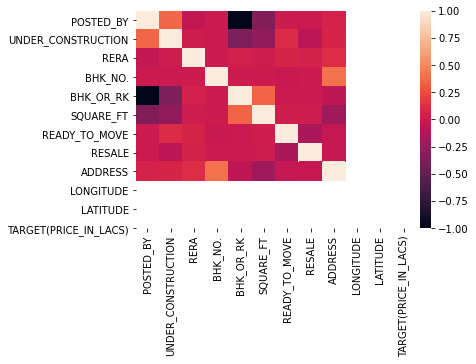

In [27]:
sns.heatmap(df.corr(),xticklabels=df.columns,yticklabels=df.columns)
plt.show()

In [28]:
y=df["TARGET(PRICE_IN_LACS)"]

In [29]:
x=df.drop(["TARGET(PRICE_IN_LACS)","ADDRESS"],axis="columns")

In [30]:
x=pd.get_dummies(x)

In [31]:
x

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_BHK,BHK_OR_RK_RK
0,0,0,2,1300.236407,1,1,12.969910,77.597960,0,0,1,1,0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,0,1,0,1,0
2,0,0,2,933.159722,1,1,12.778033,77.632191,0,0,1,1,0
3,0,1,2,929.921143,1,1,28.642300,77.344500,0,0,1,1,0
4,1,0,2,999.009247,0,1,22.592200,88.484911,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,3,2500.000000,1,1,27.140626,78.043277,0,0,1,1,0
29447,0,0,2,769.230769,1,1,39.945409,-86.150721,0,0,1,1,0
29448,0,0,2,1022.641509,1,1,26.928785,75.828002,0,1,0,1,0
29449,0,0,2,927.079009,1,1,12.900150,80.227910,0,0,1,1,0


In [32]:
from sklearn.model_selection import train_test_split as tts

In [33]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.2)

In [34]:
from sklearn.linear_model import LinearRegression as lr

In [35]:
model=lr()

In [36]:
model.fit(xtrain,ytrain)

LinearRegression()

In [37]:
y_pred=model.predict(xtest)

In [38]:
y_pred

array([102.78517152,  43.01095289, -77.34359772, ..., 776.42883541,
       -28.12701931, 130.37602355])